# Exercise: Fitting a Lorentzian peak over a quadratic background

Let's try to fit a slightly more complex distribution than a gaussian. The following histogram should fit well a Lorenzian peak on quadratic background.

Here is the histogram:

In [1]:
import ROOT

data = [ 6,1,10,12,6,13,23,22,15,21,
         23,26,36,25,27,35,40,44,66,81,
         75,57,48,45,46,41,35,36,53,32,
         40,37,38,31,36,44,42,37,32,32,
         43,44,35,33,33,39,29,41,32,44,
         26,39,29,35,32,21,21,15,25,15 ]

title = 'Lorentzian Peak on Quadratic Background'
h = ROOT.TH1F('histo', title, nbinsx=60, xlow=0, xup=3)

for i, x in enumerate(data):
   h.SetBinContent(i+1, x) # bin 0 is the underflow bin!

Welcome to JupyROOT 6.30/02


Here are the functions we will use; a quadratic background function:

In [2]:

ROOT.gInterpreter.Declare("""
double background(double *x, double *par) {
  return par[0] + par[1]*x[0] + par[2]*x[0]*x[0];
}"""
)

True

A function for the Lorenzian peak (N.B. for simplicity we already put the peak in the right place :) )

In [3]:
ROOT.gInterpreter.Declare("""

double lorentzianPeak(double *x, double *par) {
  return (0.5*par[0]*0.2/TMath::Pi())
         / TMath::Max(1.e-10, (x[0] - 1.)*(x[0] - 1.) + .25*0.04);
}
""")

True

...and our fit function is the sum of background and peak functions:

In [4]:
%%cpp

double fitFunction(double *x, double *par) {
  return background(x, par) + lorentzianPeak(x, &par[3]);
}


In [2]:


ROOT.gInterpreter.Declare("""
#include <TMath.h>

double background(double *x, double *par) {
    return par[0] + par[1]*x[0] + par[2]*x[0]*x[0];
}

double lorentzianPeak(double *x, double *par) {
    // Lorentzian centered at x=1.0 with width 0.2
    return (0.5 * par[0] * 0.2 / TMath::Pi()) /
           TMath::Max(1.e-10, (x[0] - 1.0)*(x[0] - 1.0) + 0.25 * 0.04);
}

double fitFunction(double *x, double *par) {
    return background(x, par) + lorentzianPeak(x, &par[3]);
}
""")





True

**Expected result:**

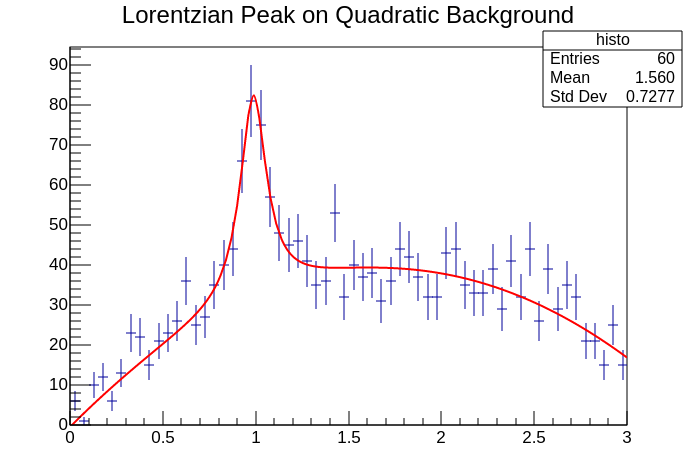

**Useful doc links:**

- [TH1](https://root.cern/doc/master/classTH1.html)
- [TF1](https://root.cern.ch/doc/master/classTF1.html)
- [TH1::Fit](https://root.cern.ch/doc/master/classTH1.html#a63eb028df86bc86c8e20c989eb23fb2a)

****************************************
         Invalid FitResult  (status = 2 )
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      60.4411
NDf                       =           54
Edm                       =  1.47042e-18
NCalls                    =          102
bg_c                      =    -0.896424   +/-   0           
bg_lin                    =      45.0577   +/-   0           
bg_qd                     =     -13.0281   +/-   0           
amp                       =      14.8596   +/-   0           
p4                        =            0   +/-   0           
p5                        =            0   +/-   0           


Warning in <TROOT::Append>: Replacing existing TH1: histo (Potential memory leak).
input_line_162:4:8: error: redefinition of 'background'
double background(double *x, double *par) {
       ^
input_line_57:4:8: note: previous definition is here
double background(double *x, double *par) {
       ^
input_line_162:8:8: error: redefinition of 'lorentzianPeak'
double lorentzianPeak(double *x, double *par) {
       ^
input_line_57:8:8: note: previous definition is here
double lorentzianPeak(double *x, double *par) {
       ^
input_line_162:14:8: error: redefinition of 'fitFunction'
double fitFunction(double *x, double *par) {
       ^
input_line_57:14:8: note: previous definition is here
double fitFunction(double *x, double *par) {
       ^
Warning in <Fit>: Abnormal termination of minimization.
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


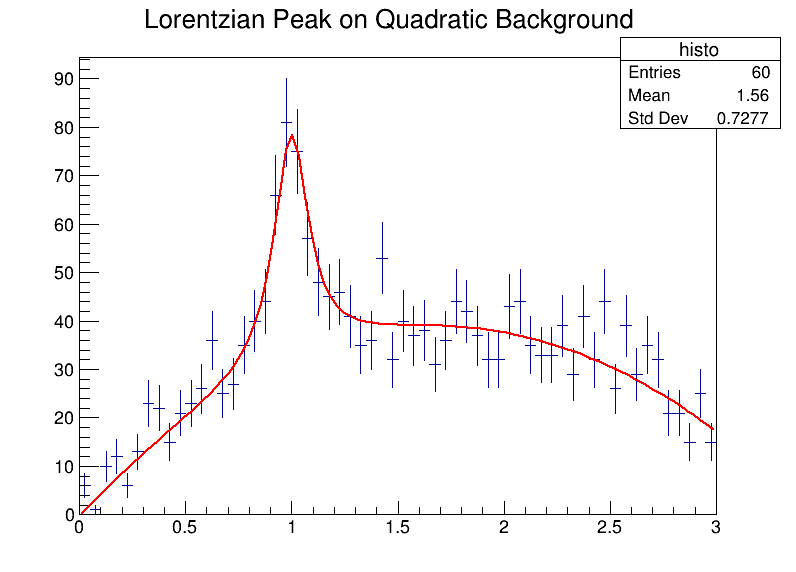

In [20]:

import ROOT

data = [ 6,1,10,12,6,13,23,22,15,21,
         23,26,36,25,27,35,40,44,66,81,
         75,57,48,45,46,41,35,36,53,32,
         40,37,38,31,36,44,42,37,32,32,
         43,44,35,33,33,39,29,41,32,44,
         26,39,29,35,32,21,21,15,25,15 ]

title = 'Lorentzian Peak on Quadratic Background'
h = ROOT.TH1F('histo', title, nbinsx=60, xlow=0, xup=3)

for i, x in enumerate(data):
   h.SetBinContent(i+1, x) # bin 0 is the underflow bin!

ROOT.gInterpreter.Declare("""
#include <TMath.h>

double background(double *x, double *par) {
    return par[0] + par[1]*x[0] + par[2]*x[0]*x[0];
}

double lorentzianPeak(double *x, double *par) {
    // Lorentzian centered at x=1.0 with width 0.2
    return (0.5 * par[0] * 0.2 / TMath::Pi()) /
           TMath::Max(1.e-10, (x[0] - 1.0)*(x[0] - 1.0) + 0.25 * 0.04);
}

double fitFunction(double *x, double *par) {
    return background(x, par) + lorentzianPeak(x, &par[3]);
}
""")


#defining fit functio
fit = ROOT.TF1("fit", ROOT.fitFunction, 0, 3, 6)

#initial guesses
fit.SetParameters(10, -10,10, 60)  

#set parameter names 
fit.SetParNames("bg_c", "bg_lin", "bg_qd", "amp")

#fit the histogram
result=h.Fit(fit, "S")  

#Draw the histogram and fit
c= ROOT.TCanvas("c", "Fit Result", 800, 600)
h.SetMarkerStyle(0)
h.SetMarkerSize(1)
h.Draw("E")
fit.Draw("same")
c.Draw()

